# Python-APIs - What's the Weather Like?

### Analysis:
    
**Observed trend 1** - From the latitude Vs temperature plot, we can deduce 
that the temperature increases at it reaches 0 degree at the equator and 
decreases in either direction (north or south). However, lesser towards the south pole.

**Observed trend 2** - From the latitude Vs wind speed plot, we can deduce 
that the wind speed is more towards the negative latitude(south pole).

**Observed trend 3** - From the latitude Vs cloudiness plot, we can deduce 
that the change in latitude and cloudiness are not related.

#### Limitations

** Used owm wrapper instead of creating the url for different cities. 
   hence functionality of print log is not implemented**

In [1]:
import random
import requests
import time

import pandas as pd
import openweathermapy as owm
import matplotlib.pyplot as plt
import seaborn as sns

from citipy import citipy
from datetime import datetime
from pprint import pprint
from config import api_key
from config import gkey

In [2]:
###Step1: Generating a list of tuples of coordinates using random.uniform \
#       (not randon.randint)

#Initializing Coordinates' list
Coordinates = []

#Creating tuples of lat & long using random.uniform & appending to the list
for i in range(500):
    lat,long = round(random.uniform(-90,90),2),round(random.uniform(-180,180),2)
    Coordinates.append((lat,long))

#Display a few coordinates
Coordinates[0:4]

[(86.47, -45.34), (-57.01, 103.03), (6.99, 12.82), (-78.83, -11.76)]

In [3]:
###Step 2:Randomly select at least 500 unique (non-repeat) cities 
#based on latitude and longitude.Using "citipy" module

#Initializing Cities' list to hold the object returned from citipy
Cities = []

#Getting nearest cities using "citipy" using latitudes & longitudes
for coordinate_pairs in Coordinates:
    lati,longi = coordinate_pairs
    Cities.append(citipy.nearest_city(lati,longi)) 

#Initializing the city_names' list to hold the city names
Nearest_City_names = []
Countries_names = []

#Generate Cities List
for city in Cities:
    Nearest_City_names.append(city.city_name.title())   
    Countries_names.append(city.country_code.upper())

#Display a few city names
print(Nearest_City_names[0:4])
print(Countries_names[0:4])

['Upernavik', 'Busselton', 'Tignere', 'Cape Town']
['GL', 'AU', 'CM', 'ZA']


In [4]:
###Step3:Perform a weather check on each of the cities using a series of 
#successive API calls.

#Settings
Settings={"units":"imperial","APPID":api_key}

#Method1
Views = {
        "Summary1" : ["coord.lon", "coord.lat","main.temp","main.humidity","wind.speed","clouds.all"]
        }
#Method2
Summary2 = ["coord.lon","coord.lat","main.temp","main.humidity","wind.speed","clouds.all"]

Selected_data1 = []
Weather_data1 = []

Selected_data2 = []
Weather_data2 = []

In [5]:
#Get current weather using coordinates (Use either of the methods and 
#comment the other one)

#Method1
# for coordinate in Coordinates:
#     Weather_data1 = owm.get_current(coordinate,**Settings)
#     Selected_data1.append(Weather_data1.get_dict(Views["Summary1"]))
#Selected_data = Selected_data1
#Method2
Weather_data2 = [owm.get_current(coordinate,**Settings) for coordinate in Coordinates]
Selected_data2 = [response(*Summary2) for response in Weather_data2]
Selected_data = Selected_data2

In [6]:
Column_names = ["Longitude (Degrees)","Latitude (Degrees)","Maximum Temperature (F)",
                "Humidity (%)","Wind Speed (MPH)","Cloudiness (%)"]

In [7]:
Weather_Dataframe = pd.DataFrame(Selected_data, index=Nearest_City_names,
                                columns = Column_names)                                       

Weather_Dataframe.reset_index(inplace=True)
Weather_Dataframe.rename(columns={"index":"Nearest City Names"},inplace=True)
#Weather_Dataframe.set_index("Nearest City Names",inplace=True)

In [8]:
Weather_Dataframe.head()

,Nearest City Names,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (F),Humidity (%),Wind Speed (MPH),Cloudiness (%)
0,Upernavik,-45.34,86.47,32.16,100,11.83,80
1,Busselton,103.03,-57.01,34.77,92,26.37,88
2,Tignere,12.82,6.99,63.66,99,0.76,92
3,Cape Town,-11.76,-78.83,-19.41,44,12.06,36
4,Georgetown,-21.53,-15.93,74.64,100,15.64,0


In [9]:
Weather_Dataframe["Countries"] = Countries_names

In [10]:
Weather_Dataframe = Weather_Dataframe [["Nearest City Names","Countries","Longitude (Degrees)","Latitude (Degrees)","Maximum Temperature (F)",
                "Humidity (%)","Wind Speed (MPH)","Cloudiness (%)"]]

In [11]:
Weather_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Nearest City Names         500 non-null object
Countries                  500 non-null object
Longitude (Degrees)        500 non-null float64
Latitude (Degrees)         500 non-null float64
Maximum Temperature (F)    500 non-null float64
Humidity (%)               500 non-null int64
Wind Speed (MPH)           500 non-null float64
Cloudiness (%)             500 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.3+ KB


In [12]:
Weather_Dataframe.head()

,Nearest City Names,Countries,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (F),Humidity (%),Wind Speed (MPH),Cloudiness (%)
0,Upernavik,GL,-45.34,86.47,32.16,100,11.83,80
1,Busselton,AU,103.03,-57.01,34.77,92,26.37,88
2,Tignere,CM,12.82,6.99,63.66,99,0.76,92
3,Cape Town,ZA,-11.76,-78.83,-19.41,44,12.06,36
4,Georgetown,SH,-21.53,-15.93,74.64,100,15.64,0


In [13]:
Weather_Dataframe.to_csv("MyOutputFiles/Weather2.csv",header=True)

Objextive: To build a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Temperature vs. Latitude Plot

In [14]:
x = Weather_Dataframe["Latitude (Degrees)"]
y1 = Weather_Dataframe["Maximum Temperature (F)"]

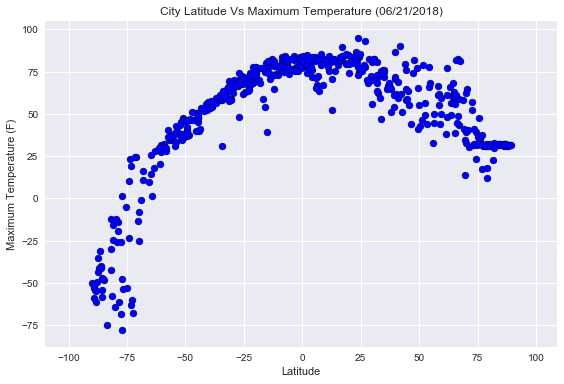

In [15]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Maximum Temperature (F)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y1.min()-10,y1.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title(f"City Latitude Vs Maximum Temperature ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Temperature(F) vs. Latitude2.png")
plt.show()

Humidity(%) vs. Latitude Plot

In [16]:
y2 = Weather_Dataframe["Humidity (%)"]

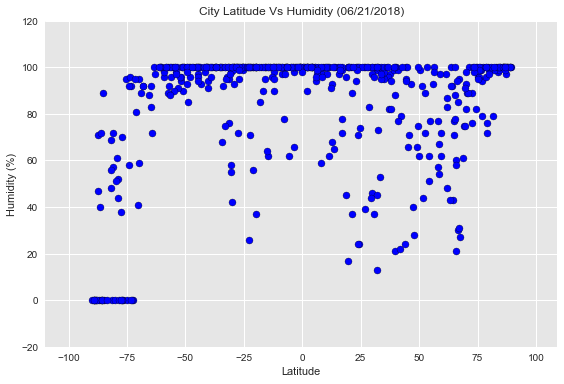

In [17]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Humidity (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y2.min()-20,y2.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Humidity(%) vs. Latitude2.png")
plt.show()

Wind Speed(mph) vs. Latitude Plot

In [18]:
y3 = Weather_Dataframe["Wind Speed (MPH)"]

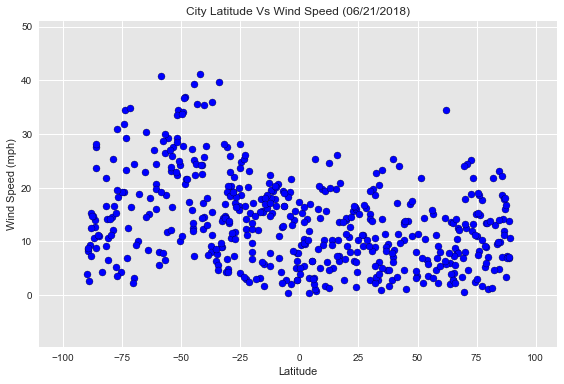

In [19]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Wind Speed (MPH)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y3.min()-10,y3.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Wind Speed(MPH) vs. Latitude2.png")
plt.show()

Cloudiness(%) vs. Latitude Plot

In [20]:
y4 = Weather_Dataframe["Cloudiness (%)"]

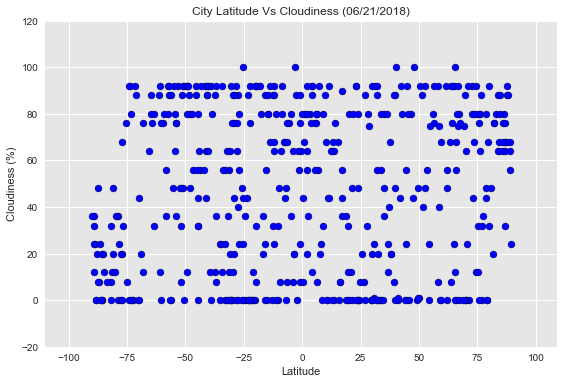

In [21]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Cloudiness (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y4.min()-20,y4.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Cloudiness(%) vs. Latitude2.png")
plt.show()